#Handwritten Digit Prediction

Data --> Image processing(already done in MNIST) --> train test split(already done in MNIST) --> Neural Network --> Testing --> Building a Predictive model

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image,ImageOps
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [103]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [104]:
type(X_train)

numpy.ndarray

In [105]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [106]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

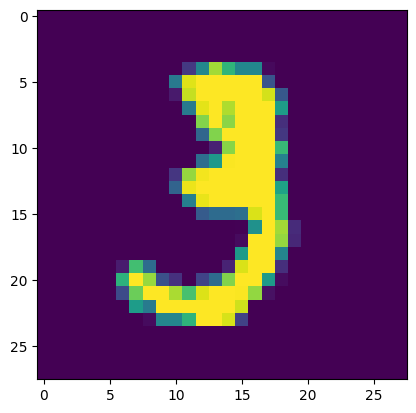

3


In [107]:
plt.imshow(X_train[10])
plt.show()
print(Y_train[10])

In [108]:
print(np.unique(Y_train))
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [109]:
X_train = X_train/255
X_test = X_test/255

In [110]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

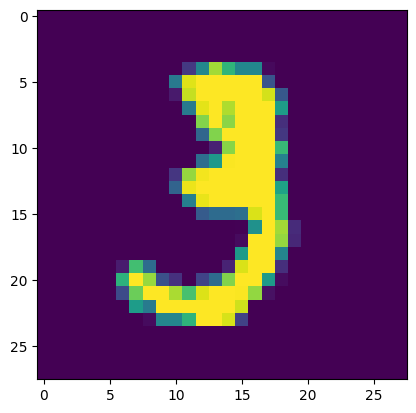

In [111]:
plt.imshow(X_train[10])

In [112]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [113]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [114]:
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3015 - accuracy: 0.9118
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1436 - accuracy: 0.9563
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1063 - accuracy: 0.9670
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0865 - accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0717 - accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0621 - accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0531 - accuracy: 0.9828
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0501 - accuracy: 0.9844
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0418 - accuracy: 0.9859
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.037

In [115]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1009 - accuracy: 0.9729
0.9728999733924866


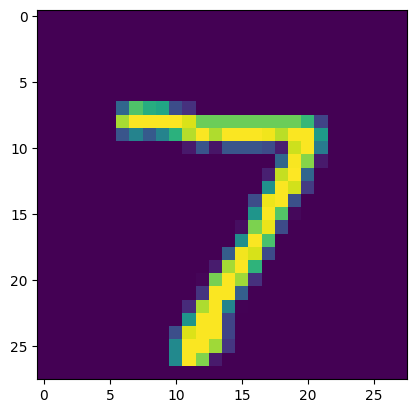

In [116]:
plt.imshow(X_test[0])
plt.show()

In [117]:
print(Y_test[0])

7


In [118]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [119]:
print(Y_pred[0])

[8.2849465e-06 8.9132756e-02 2.7065912e-01 8.4459358e-01 9.6468357e-06
 5.5109574e-03 1.7997978e-09 9.9999315e-01 7.0894614e-04 2.6322439e-01]


In [120]:
labels = [np.argmax(i) for i in Y_pred]
print(labels[0])

7


In [121]:
conf_mat = confusion_matrix(Y_test, labels)

In [122]:
print(conf_mat)

tf.Tensor(
[[ 960    0    2    1    1    8    3    1    2    2]
 [   0 1124    4    0    0    1    2    0    4    0]
 [   4    2 1008    3    4    1    1    3    6    0]
 [   0    0    5  959    0   27    0    8    7    4]
 [   0    0    3    0  964    4    4    2    0    5]
 [   2    0    0    3    2  874    3    2    2    4]
 [   3    3    1    1    3   14  930    0    3    0]
 [   0    5   13    0    2    1    0 1001    1    5]
 [   1    2    6    4    4    6    1    8  938    4]
 [   2    3    0    3   17    4    0    6    3  971]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

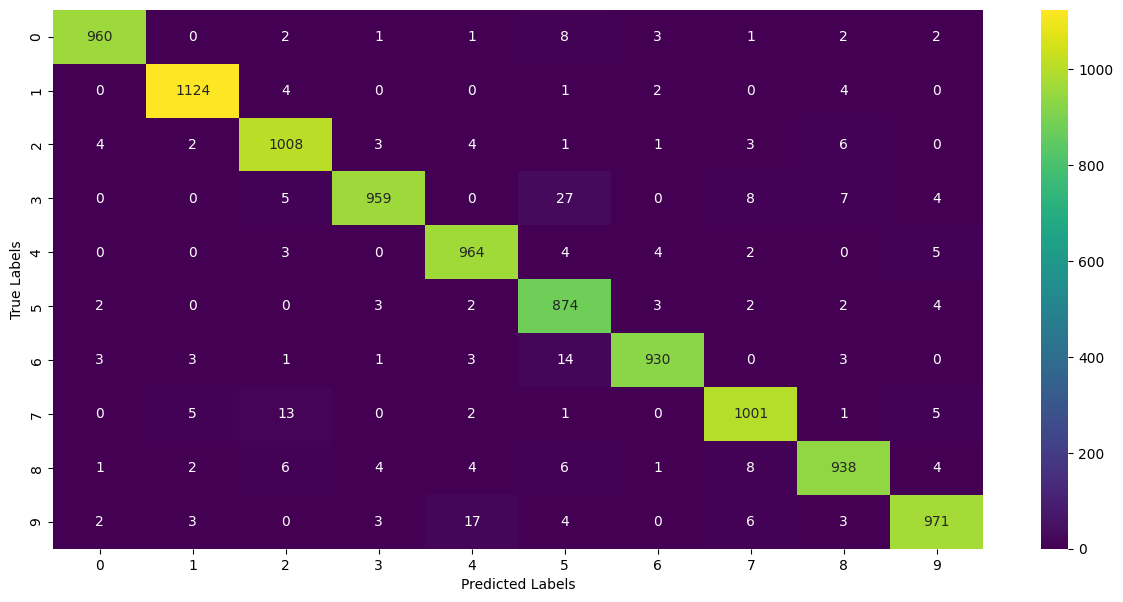

In [123]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt='d', cmap = 'viridis' )
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Path of the image :/content/Handwritten_digit6.jpg


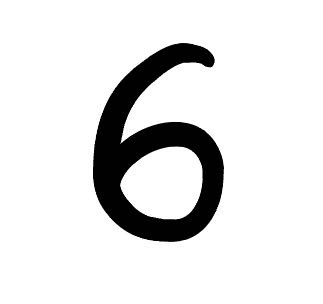

1/1 [==============================] - 0s 25ms/step
[[1.0161389e-03 1.3232246e-03 6.7759524e-05 1.0053774e-04 6.9736892e-01
  9.5182776e-01 9.7619152e-01 1.7761368e-04 8.1355566e-01 3.5447781e-03]]
The number written is : 6


In [131]:
# Predictive System
input_image_path = input('Path of the image :')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale_img = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
image = cv2.resize(grayscale_img,(28,28))
'''Since the trained images have a black background
   while the input has a white background we have to further process it'''
image_inv = 255 - image
image_inv = image_inv/255
image_reshape = np.reshape(image_inv,[1,28,28])
prediction = model.predict(image_reshape)
print(prediction)
print('The number written is :',np.argmax(prediction))